Dataset shape: (9316, 12)


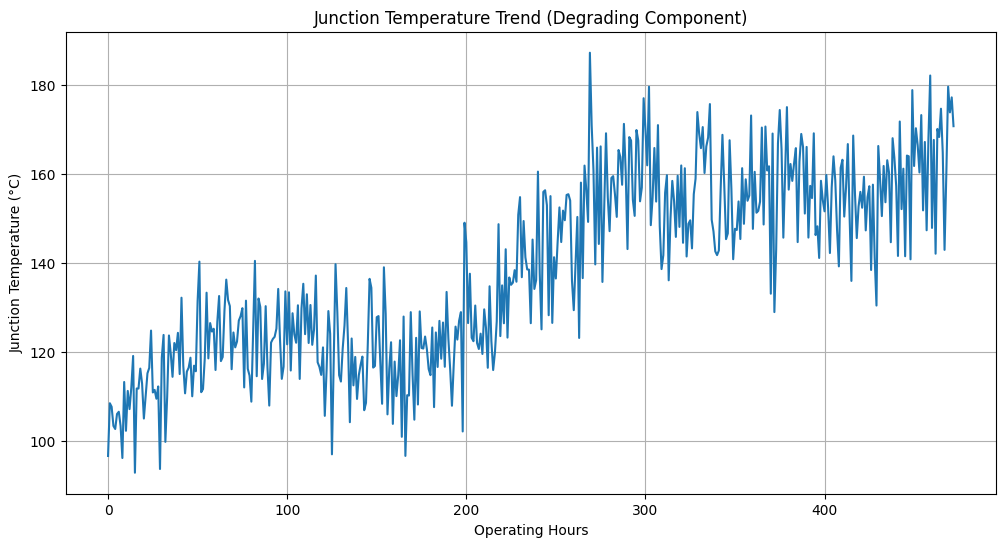

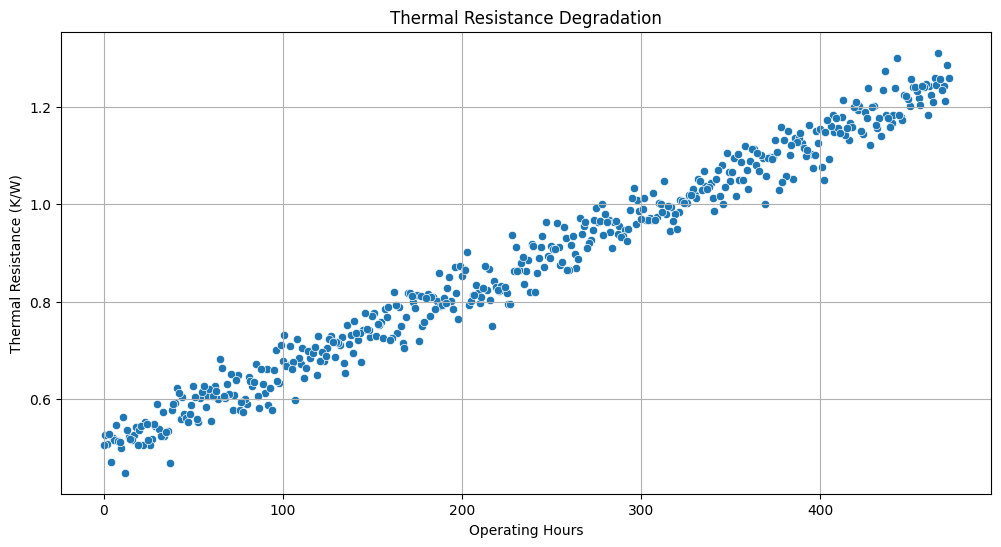

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('../data/power_electronics_sensor_data.csv')

# Display first rows
print("Dataset shape:", data.shape)
data.head()

# Plot: Junction temperature over time for one component
component_data = data[data['component_id'] == 'IGBT_009']  # degrading one

plt.figure(figsize=(12, 6))
sns.lineplot(x=component_data['operating_hours'], y=component_data['junction_temp_C'])
plt.xlabel('Operating Hours')
plt.ylabel('Junction Temperature (°C)')
plt.title('Junction Temperature Trend (Degrading Component)')
plt.grid(True)
plt.show()

# Plot: Thermal resistance degradation
plt.figure(figsize=(12, 6))
sns.scatterplot(x=component_data['operating_hours'], y=component_data['thermal_resistance_KW'])
plt.xlabel('Operating Hours')
plt.ylabel('Thermal Resistance (K/W)')
plt.title('Thermal Resistance Degradation')
plt.grid(True)
plt.show()

In [2]:
data.head()

,timestamp,component_id,load_current_A,switching_frequency_Hz,junction_temp_C,case_temp_C,voltage_V,thermal_resistance_KW,ambient_temp_C,operating_hours,health_status,failure_occurred
0,2024-01-26 10:00:00,IGBT_002,50.162499,10881.063832,98.900648,57.988383,598.047972,0.475035,30.423044,610,1.000000,0.0
1,2024-01-04 21:00:00,IGBT_010,60.624836,10396.194604,127.366464,65.097652,595.325239,0.614494,33.603095,93,0.849189,0.0
2,2024-01-22 02:00:00,IGBT_010,61.002005,9864.778941,169.711086,50.488070,600.198597,1.176143,16.045401,506,0.179459,1.0
3,2024-01-03 10:00:00,IGBT_002,48.729483,10388.986182,109.004299,67.052212,614.844591,0.502521,32.457285,58,1.000000,0.0
4,2024-02-09 01:00:00,IGBT_008,45.610738,10121.660944,91.392329,49.583853,610.894522,0.532336,15.706622,937,1.000000,0.0


In [16]:
data[data['component_id'] == 'IGBT_009'].head()
#data_IGBT2 = data[data['component_id'] == 'IGBT_002']
data_IGBT9 = data[data['component_id'] == 'IGBT_009']

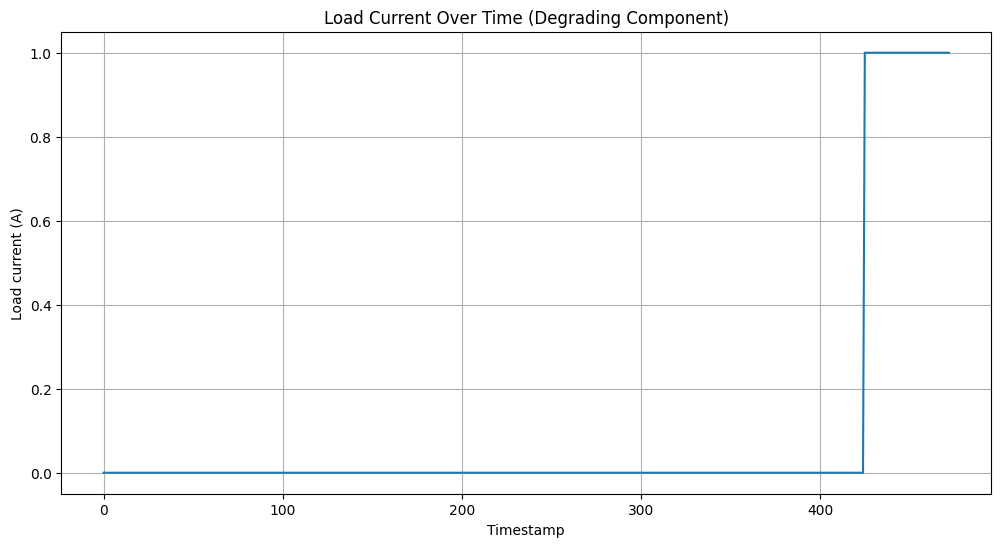

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=data_IGBT9['operating_hours'], y=data_IGBT9['failure_occurred'])
plt.xlabel('Timestamp')
plt.ylabel('Load current (A)')
plt.title('Load Current Over Time (Degrading Component)')
plt.grid(True)
plt.show()


📊 Dataset Overview:
Total samples: 9316
Healthy samples: 8287
Degrading samples: 1029
Failure rate: 1.12%


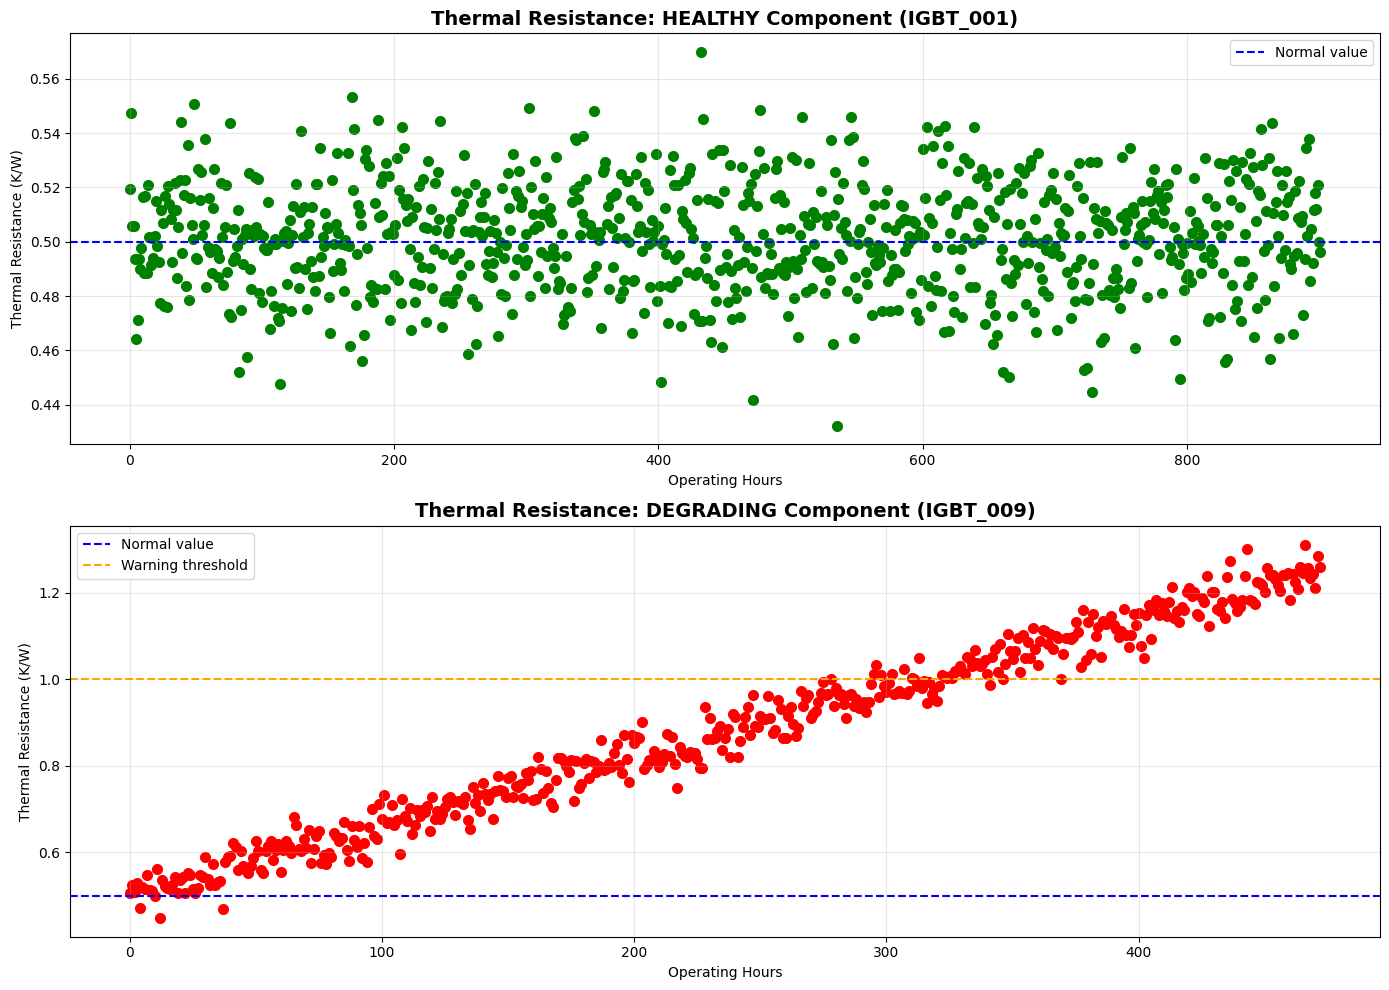


🔥 KEY INSIGHT:
Notice how thermal resistance INCREASES over time in degrading component!
This is THE primary failure indicator.


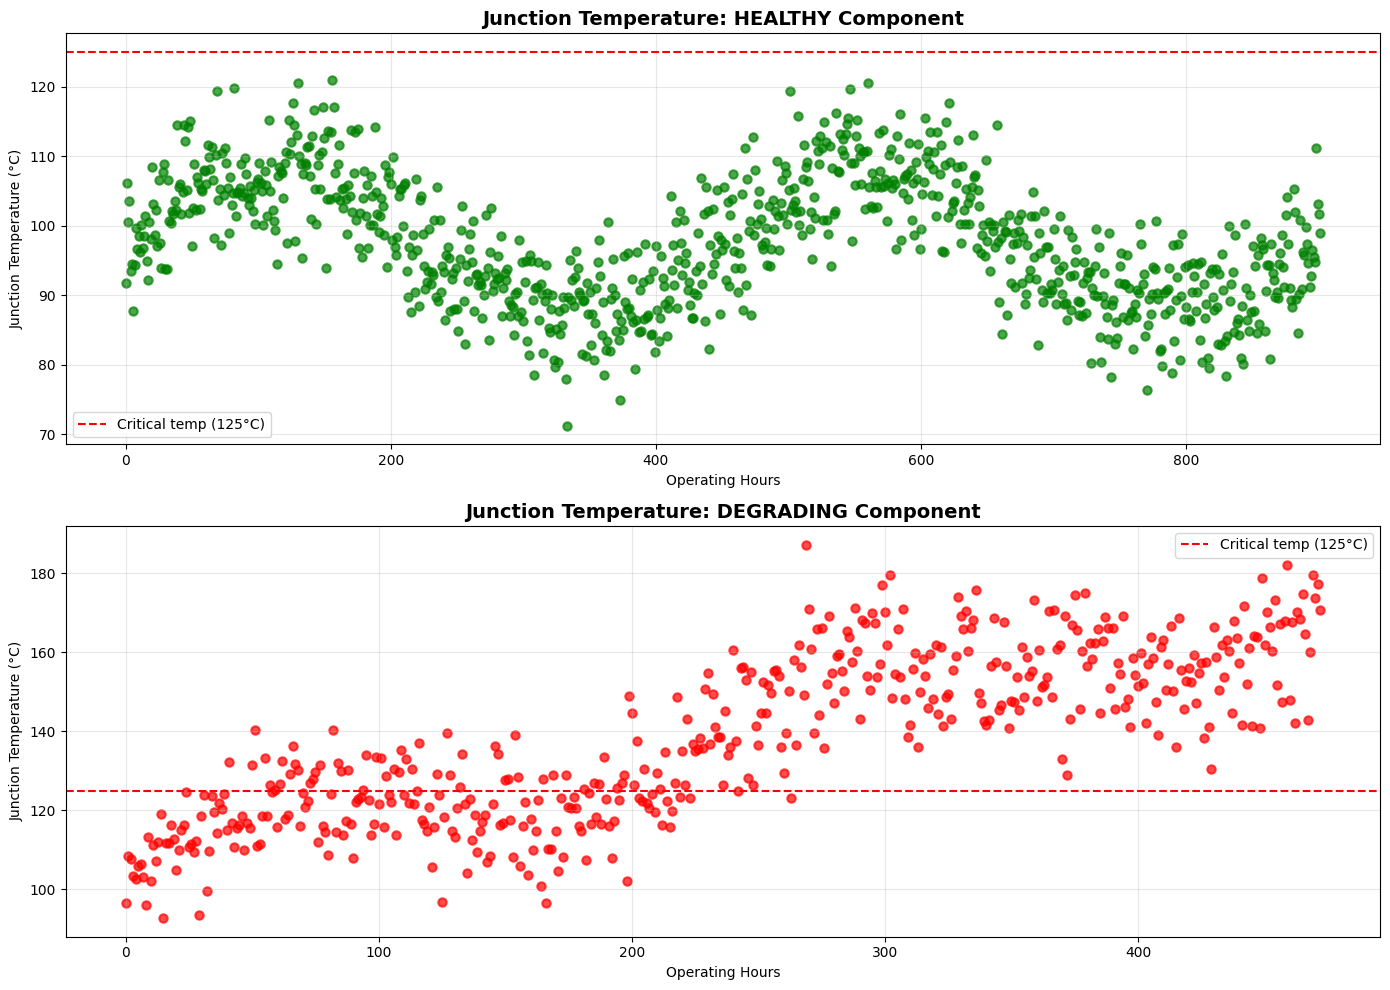


🌡️ KEY INSIGHT:
Junction temp INCREASES over time in degrading component (same load!)
This happens because thermal resistance is increasing.


C:\Users\sselm\AppData\Local\Temp\ipykernel_16648\533463274.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthy_component['temp_diff'] = healthy_component['junction_temp_C'] - healthy_component['case_temp_C']
C:\Users\sselm\AppData\Local\Temp\ipykernel_16648\533463274.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degrading_component['temp_diff'] = degrading_component['junction_temp_C'] - degrading_component['case_temp_C']


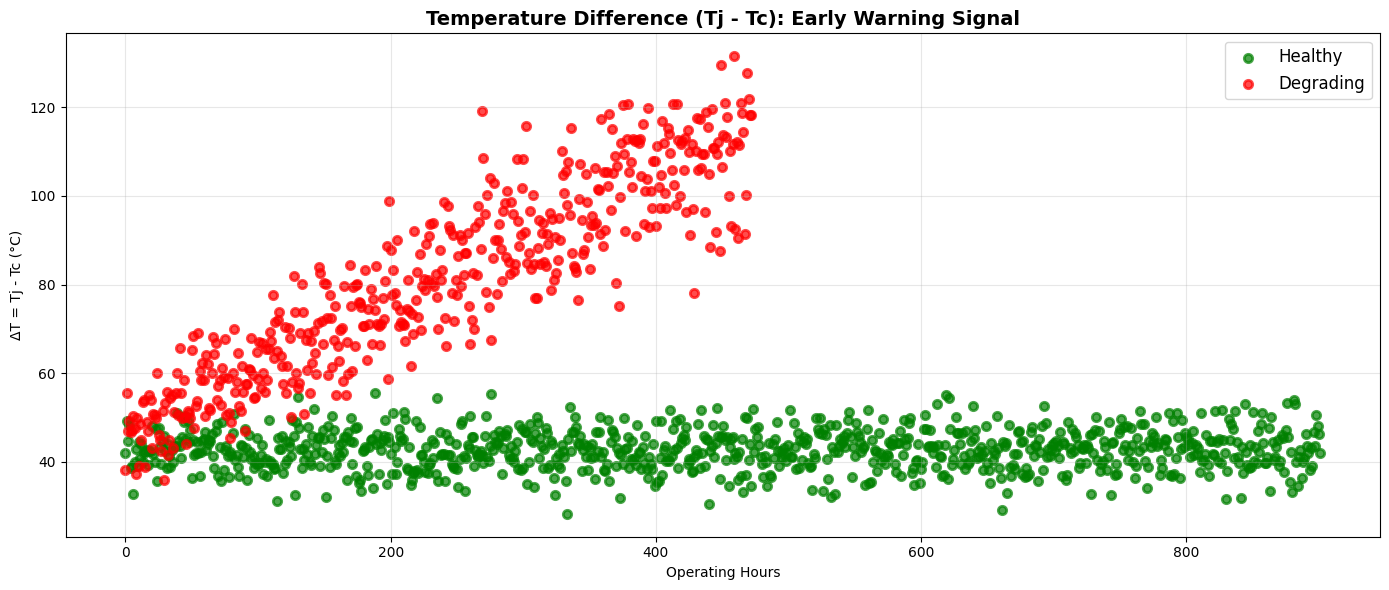


📊 KEY INSIGHT:
Temperature difference (Tj - Tc) directly reflects thermal resistance.
When this starts increasing, failure is approaching!

STATISTICAL COMPARISON: Healthy vs Degrading

Thermal Resistance (K/W):
  Healthy avg:    0.500 ± 0.020
  Degrading avg:  0.876 ± 0.219
  Difference:     0.376 K/W

Junction Temperature (°C):
  Healthy avg:    97.5 ± 8.8
  Degrading avg:  138.0 ± 20.7
  Difference:     40.4 °C

CORRELATION: Which features predict failure?

Correlation with failure:
failure_occurred         1.000000
thermal_resistance_KW    0.511807
junction_temp_C          0.381171
load_current_A           0.064774
operating_hours         -0.000450
case_temp_C             -0.052276
Name: failure_occurred, dtype: float64

🎯 TOP PREDICTORS:
1. Thermal resistance: Strongest indicator
2. Junction temperature: Secondary indicator
3. Operating hours: Age matters


In [19]:


# Identify healthy vs degrading components
healthy = data[data['component_id'].isin(['IGBT_001', 'IGBT_002', 'IGBT_003', 'IGBT_004',
                                          'IGBT_005', 'IGBT_006', 'IGBT_007', 'IGBT_008'])]
degrading = data[data['component_id'].isin(['IGBT_009', 'IGBT_010'])]

print("📊 Dataset Overview:")
print(f"Total samples: {len(data)}")
print(f"Healthy samples: {len(healthy)}")
print(f"Degrading samples: {len(degrading)}")
print(f"Failure rate: {data['failure_occurred'].mean()*100:.2f}%")

# Plot 1: Thermal Resistance Over Time (KEY INDICATOR)
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Healthy component
healthy_component = data[data['component_id'] == 'IGBT_001']
axes[0].scatter(healthy_component['operating_hours'], 
             healthy_component['thermal_resistance_KW'],
             color='green', linewidth=2)
axes[0].set_title('Thermal Resistance: HEALTHY Component (IGBT_001)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Operating Hours')
axes[0].set_ylabel('Thermal Resistance (K/W)')
axes[0].axhline(y=0.5, color='blue', linestyle='--', label='Normal value')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Degrading component
degrading_component = data[data['component_id'] == 'IGBT_009']
axes[1].scatter(degrading_component['operating_hours'], 
             degrading_component['thermal_resistance_KW'],
             color='red', linewidth=2)
axes[1].set_title('Thermal Resistance: DEGRADING Component (IGBT_009)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Operating Hours')
axes[1].set_ylabel('Thermal Resistance (K/W)')
axes[1].axhline(y=0.5, color='blue', linestyle='--', label='Normal value')
axes[1].axhline(y=1.0, color='orange', linestyle='--', label='Warning threshold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/thermal_resistance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🔥 KEY INSIGHT:")
print("Notice how thermal resistance INCREASES over time in degrading component!")
print("This is THE primary failure indicator.")

# Plot 2: Junction Temperature Trend
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

axes[0].scatter(healthy_component['operating_hours'], 
             healthy_component['junction_temp_C'],
             color='green', linewidth=1.5, alpha=0.7)
axes[0].set_title('Junction Temperature: HEALTHY Component', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Operating Hours')
axes[0].set_ylabel('Junction Temperature (°C)')
axes[0].axhline(y=125, color='red', linestyle='--', label='Critical temp (125°C)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(degrading_component['operating_hours'], 
             degrading_component['junction_temp_C'],
             color='red', linewidth=1.5, alpha=0.7)
axes[1].set_title('Junction Temperature: DEGRADING Component', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Operating Hours')
axes[1].set_ylabel('Junction Temperature (°C)')
axes[1].axhline(y=125, color='red', linestyle='--', label='Critical temp (125°C)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/junction_temp_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🌡️ KEY INSIGHT:")
print("Junction temp INCREASES over time in degrading component (same load!)")
print("This happens because thermal resistance is increasing.")

# Plot 3: Temperature Difference (Tj - Tc)
fig, ax = plt.subplots(figsize=(14, 6))

healthy_component['temp_diff'] = healthy_component['junction_temp_C'] - healthy_component['case_temp_C']
degrading_component['temp_diff'] = degrading_component['junction_temp_C'] - degrading_component['case_temp_C']

ax.scatter(healthy_component['operating_hours'], healthy_component['temp_diff'], 
        color='green', label='Healthy', linewidth=2, alpha=0.7)
ax.scatter(degrading_component['operating_hours'], degrading_component['temp_diff'], 
        color='red', label='Degrading', linewidth=2, alpha=0.7)

ax.set_title('Temperature Difference (Tj - Tc): Early Warning Signal', fontsize=14, fontweight='bold')
ax.set_xlabel('Operating Hours')
ax.set_ylabel('ΔT = Tj - Tc (°C)')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/temp_difference_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 KEY INSIGHT:")
print("Temperature difference (Tj - Tc) directly reflects thermal resistance.")
print("When this starts increasing, failure is approaching!")

# Statistical comparison
print("\n" + "="*70)
print("STATISTICAL COMPARISON: Healthy vs Degrading")
print("="*70)

print("\nThermal Resistance (K/W):")
print(f"  Healthy avg:    {healthy['thermal_resistance_KW'].mean():.3f} ± {healthy['thermal_resistance_KW'].std():.3f}")
print(f"  Degrading avg:  {degrading['thermal_resistance_KW'].mean():.3f} ± {degrading['thermal_resistance_KW'].std():.3f}")
print(f"  Difference:     {(degrading['thermal_resistance_KW'].mean() - healthy['thermal_resistance_KW'].mean()):.3f} K/W")

print("\nJunction Temperature (°C):")
print(f"  Healthy avg:    {healthy['junction_temp_C'].mean():.1f} ± {healthy['junction_temp_C'].std():.1f}")
print(f"  Degrading avg:  {degrading['junction_temp_C'].mean():.1f} ± {degrading['junction_temp_C'].std():.1f}")
print(f"  Difference:     {(degrading['junction_temp_C'].mean() - healthy['junction_temp_C'].mean()):.1f} °C")

# Correlation analysis
print("\n" + "="*70)
print("CORRELATION: Which features predict failure?")
print("="*70)

corr_data = data[['thermal_resistance_KW', 'junction_temp_C', 'case_temp_C', 
                  'load_current_A', 'operating_hours', 'failure_occurred']]
correlation = corr_data.corr()['failure_occurred'].sort_values(ascending=False)

print("\nCorrelation with failure:")
print(correlation)

print("\n🎯 TOP PREDICTORS:")
print("1. Thermal resistance: Strongest indicator")
print("2. Junction temperature: Secondary indicator")  
print("3. Operating hours: Age matters")